In [1]:
import numpy as np
import pandas as pd

# This is a section name

## This is a subsection

### Subsubsection
> paragraphs

- list
    - sub.list
* list 2.0
1. numbered list
    1. numbered sub-list

# Markdown commands:
## HTML:
* <p>&#9658</p> UTF-8 shapes
* <a href="https://www.w3schools.com/charsets/ref_utf_geometric.asp">references</a>
<img src="heat100_2.png" alt="valami" title="Kép">

* local image
<img src="https://upload.wikimedia.org/wikipedia/commons/8/87/Double_pendulum_flips_graph.png" width="400">

* image from link
* <i> italics </i>
* <b> bold text </b>

## Markdown/ latex commands:
Use these if you want to save to pdf, as it uses latex converter and ignores HTML input

* $\mathrm{LaTeX}~\mathrm{equation}=\frac{a^2}{\dot{b}}$
* `code style text`
* __bold__ **text**
* _italic_ *text*
***
* horizontal line

## Links
* [Link to section](#this-is-a-section-name)
* <a href="subsubsection">HTML link</a>
* __[External link](https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet)__
![image](heat100_2.png)
![external image](https://upload.wikimedia.org/wikipedia/commons/8/87/Double_pendulum_flips_graph.png)
* note that `nbconvert` for some reason cannot produce a pdf if you include images from external sources

# Utilities
In the following, I will provide some amount of Python code that helps in any kind of data evaluation (or at least I hope it helps).

## Acquiring data
You can use `pandas` to display tables in a fancy way when converting to pdf, or even when importng data from various file formats.

In [2]:
import bs4
from os import PathLike

random_data = np.random.random(size=[2, 7])*100
hdata = np.loadtxt('Hszinkep', dtype=float)
data_panda = pd.read_csv('SDS00002.CSV', skiprows=2, header=None, usecols=[3, 4, 5]).to_numpy()

Now txt and csv are easy, but what about for example `.log` files?
For this you'll need to install `bs4` as well as `lxml` with pip.

In [3]:

def tablegen(name: str | bytes | PathLike[str] | PathLike[bytes] | int, offset: int | float = 0):
    log = bs4.BeautifulSoup(open(name), 'lxml')
    table = log.table
    rows = table.find_all('row')
    out = []
    t0 = -1
    for tr in rows:
        t = tr.find_all('t')
        t = str([i.text for i in t][0])
        t = sum(x * int(t) for x, t in zip([3600, 60, 1], t.split(":")))
        if t0 == -1: t0 = t+offset
        p = tr.find_all('p')
        try:
            p = float([i.text for i in p][0])
            out.append([t, p])
        except ValueError:
            p = None

    out = np.array(out)
    out[:,0] = out[:,0]-t0
    return np.array([out[:,0], out[:,1]])

log1 = tablegen("VrGauges1.log")

C:\Users\schba\PycharmProjects\template\venv\Lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


Displaying tables and converting them to a latex compatible text:

In [4]:
data = pd.DataFrame(data={'$col_1$': random_data[0], '$col_2$': random_data[1]})
print(data)
print(data.to_latex(column_format='c|c', decimal=',', float_format="$%.2f \pm 0,05$", index=False).replace('\\textbackslash ', '\\').replace('\$', '$').replace('\_', '_'))

     $col_1$    $col_2$
0  29.168747  34.043453
1  75.383229  19.429107
2  11.621650  41.392641
3  17.268150   2.389553
4  11.498999  37.264693
5  42.364932   8.701726
6  60.612536  59.370355
\begin{tabular}{c|c}
\toprule
$col_1$ & $col_2$ \\
\midrule
$29,17 \pm 0,05$ & $34,04 \pm 0,05$ \\
$75,38 \pm 0,05$ & $19,43 \pm 0,05$ \\
$11,62 \pm 0,05$ & $41,39 \pm 0,05$ \\
$17,27 \pm 0,05$ & $2,39 \pm 0,05$ \\
$11,50 \pm 0,05$ & $37,26 \pm 0,05$ \\
$42,36 \pm 0,05$ & $8,70 \pm 0,05$ \\
$60,61 \pm 0,05$ & $59,37 \pm 0,05$ \\
\bottomrule
\end{tabular}


## Making figures
Figures we mostly put together using `matplotlib.pyplot`. It has nearly endless customization options; I'll show some examples of how to use it.
We create a figure with `plt.subplots`, it returns a figure and an axis object, among which the axis object is more commonly used, as the plot itself is made on the axis.
You can use `matplotlib qt` for the plot to appear in a different window. This is useful if you want to zoom in it or whatever. Otherwise, just use `matplotlib inline` for inline plots.

In [5]:
import matplotlib.pyplot as plt

%matplotlib qt
import PyQt5
#random data
Ube = np.array([3.5, 4.0, 4.5, 4.6, 4.65, 4.67, 4.69, 4.70, 4.8, 5.0])
Uki = np.array([14.36, 14.36, 14.36, 14.36, 14.36, 14.36, -12.77, -12.77, -12.8, -12.8])
#making a figure with one axis
fig, ax = plt.subplots()
ax.plot(Ube, Uki, 'b--')
for i in range(len(Ube)):
    ax.arrow(Ube[i], Uki[i], 0.01, 0., head_width=0.7, head_length=0.04, fc='b', ec='b')
ax.set_xlabel(r'$U_\mathrm{be}$ (V)')
ax.set_ylabel(r'$U_\mathrm{ki}$ (V)')
ax.set_yticks([-15, -10, -5, 0, 5, 10, 15])
# Make sure to use plt.show() at the end of the figure-creation to properly show your plot. Jupyter makes this call automatically at the end of every block but leaves some other unwanted output if not called by the user.
plt.show()

As shown above, you can display a multitude of things in a figure, like arrows, text, errorbars, etc. You can get more inspiration on their [website](https://matplotlib.org/stable/tutorials/introductory/pyplot.html).
Moreover, LaTeX commands are entirely supported in matplotlib, just use the "r" prefix for the string.
You can obviously use logarithmic axes as well as shown below.

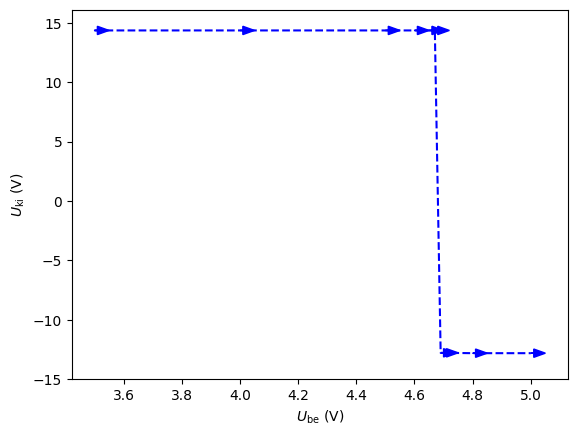

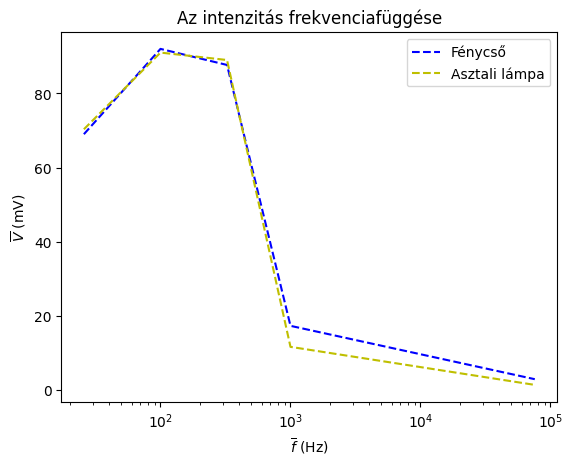

In [6]:
# data...
frek = np.array([[1.5, 50], [50, 150], [150, 500], [500, 1500], [1500, 150000]])
nemlampa = np.array([[68, 70, 69], [93, 91, 92], [88, 86, 89], [17.5, 18, 16.5], [3, 2.95, 2.9]])
lampa = np.array([[142, 131, 145], [184, 185, 180], [175, 180, 175], [29.5, 29, 28.5], [4.2, 4.4, 4.5]])

%matplotlib inline
fig, ax = plt.subplots()
ax.semilogx(frek.mean(axis=1), nemlampa.mean(axis=1), 'b--', label='Fénycső')
ax.semilogx(frek.mean(axis=1), lampa.mean(axis=1)-nemlampa.mean(axis=1), 'y--', label='Asztali lámpa')
ax.set_xlabel(r'$\overline{f}$ (Hz)')
ax.set_ylabel(r'$\overline{V}$ (mV)')
ax.set_title('Az intenzitás frekvenciafüggése')
ax.legend()
plt.show()

The usage of legends is very straightforward as well, you just need to label your plots and call `ax.legend()`.
### Saving Figures
You can also save your figures with `plt.savefig`. I recommend using pdf format, since it's supported everywhere and easy to use.

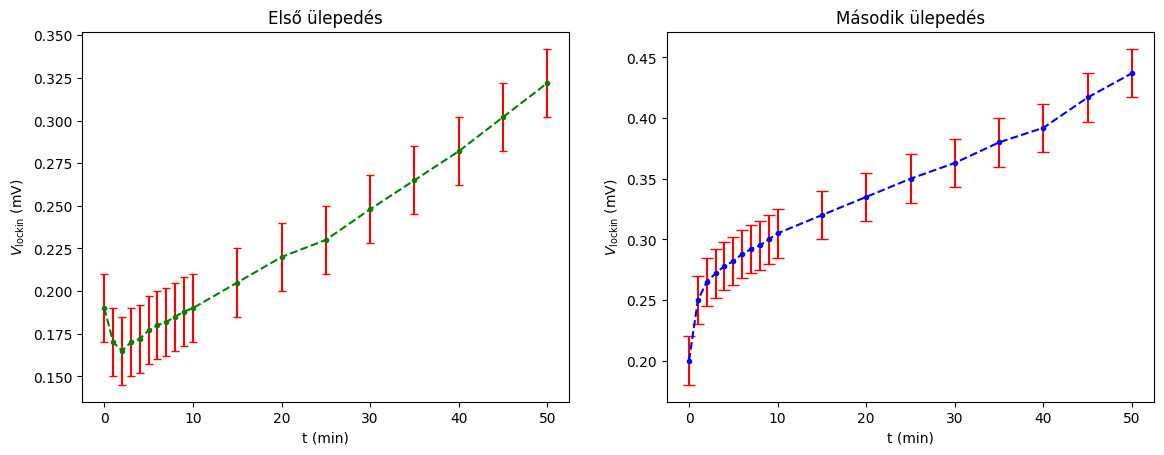

In [7]:
#more data :D
tt = np.array([0,1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50], dtype=int)
fesz = np.array([[0.190, 0.200], [0.170, 0.250], [0.165, 0.265], [0.170, 0.272], [0.172, 0.278], [0.177, 0.282], [0.180, 0.288], [0.182, 0.292], [0.185, 0.295], [0.188, 0.300], [0.190, 0.305], [0.205, 0.320], [0.220, 0.335], [0.230, 0.350], [0.248, 0.363], [0.265, 0.380], [0.282, 0.392], [0.302, 0.417], [0.322, 0.437]], dtype=float)


fig, ax = plt.subplots(ncols=2)
ax[0].errorbar(tt, fesz[:,0], yerr=np.ones(len(tt))*0.02, fmt='g--.', ecolor='r', capsize=3)
ax[0].set_xlabel(r't (min)')
ax[0].set_ylabel(r'$V_\mathrm{lockin}$ (mV)')
ax[0].set_title('Első ülepedés')

ax[1].errorbar(tt, fesz[:,1], yerr=np.ones(len(tt))*0.02, fmt='b--.', ecolor='r', capsize=4)
ax[1].set_xlabel(r't (min)')
ax[1].set_ylabel(r'$V_\mathrm{lockin}$ (mV)')
ax[1].set_title('Második ülepedés')
fig.subplots_adjust(right=1.8)
plt.savefig('4ab'+'.pdf', format='pdf', dpi=1000, bbox_inches='tight')

Above is shown also the usage of multiplots and errorbars. You can create multiple plots by specifying the number of rows and columns you want to create: `nrows` and `ncols`. As a result, multiple axes will be created as an array, which you can access the normal way (if you have multiple rows __and__ columns, you need two indices).
Errorbars work like in MatLab, meaning it's similar to `plot` but with `xerr` and `yerr` which need to be the same size as the data you're plotting.
Here's another example:

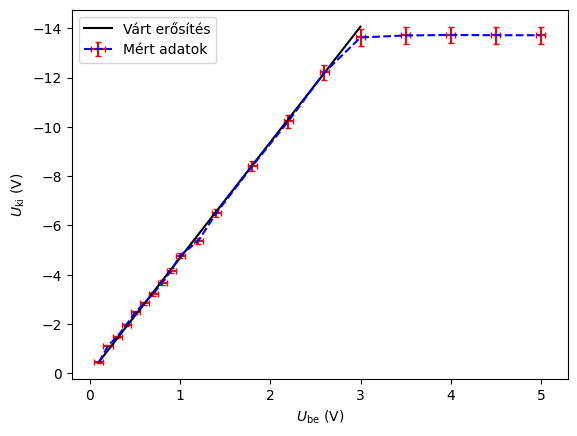

In [8]:
#I hate the lab
Rv=469*1000 #+-2
Rs=100.0*1000 #+-1
A = -Rv/Rs
Ube= np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.4, 1.8, 2.2, 2.6, 3.0, 3.5, 4.0, 4.5, 5.0])
Uki=np.array([-0.45, -1.12, -1.48, -1.95, -2.474, -2.84, -3.22, -3.68, -4.17, -4.78, -5.37, -6.50, -8.41, -10.23, -12.21, -13.63, -13.71, -13.73, -13.72, -13.72])

Ubehi = np.ones(len(Ube))*0.05
Ukihi = Uki*0.025

fig, ax = plt.subplots()
ax.errorbar(Ube, Uki, xerr=Ubehi, yerr=np.abs(Ukihi), fmt='b--', ecolor='r', capsize=2, label='Mért adatok')
ax.plot(Ube[Ube<3.5], A*Ube[Ube<3.5], 'k-', label='Várt erősítés')
ax.invert_yaxis()
ax.set_xlabel(r'$U_\mathrm{be}$ (V)')
ax.set_ylabel(r'$U_\mathrm{ki}$ (V)')
ax.legend()
plt.show()

### 3D plots
You probably won't need 3D plots that many times, but they can come in handy. `Axes3D` is the tool you want to use when making 3D plots, it works like regular plotting, but you need three sets of data (obviously).

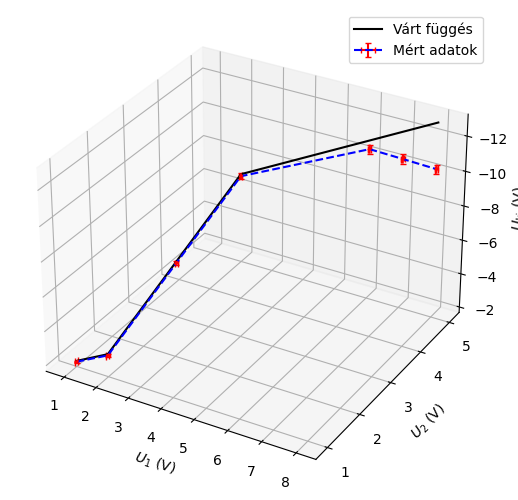

In [9]:
from mpl_toolkits.mplot3d import Axes3D

#yaaaay more stuff
Rx1=0.995*1000
Rx2=0.991*1000
Rv=0.99*1000
Rs=100*1000
U1= np.array([1., 2., 2., 2., 6., 7., 8.])
U2= np.array([1., 1., 3., 5., 5., 5., 5.])
Uki= np.array([-1.95, -2.93, -4.91, -6.88, -10.50, -10.44, -10.37])


fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.errorbar(U1, U2, Uki, fmt='b--', xerr=0.05, yerr=0.05, zerr=Uki*0.025, ecolor='r', capsize=2, label='Mért adatok')
ax.plot(U1, U2, -U1-U2, 'k-', label='Várt függés')
ax.invert_zaxis()
ax.set_xlabel(r'$U_1$ (V)')
ax.set_ylabel(r'$U_2$ (V)')
ax.set_zlabel(r'$U_\mathrm{ki}$ (V)')
ax.legend()
plt.show()

## Curve fitting
Curve fitting in Python is a very powerful tool. You can fit literally any shape to your data, only it might be somewhat difficult and take some time. For this `curve_fit` from `scipy.optimize` is recommended, as it returns you all relevant fit parameters including a covariance matrix. It requires a minimum of three parameters: a callable object (function or lambda) characterising the fit and the __x__ and __y__ data for which the fit is to be made. The callable might have any number of parameters, only rule is for the grid parameter (__x__ or __t__ or whatever) to be the first one. The algorithm fits all the other parameters.
The covariance matrix in most cases is only used for determining the standard deviance (or error, if it is more pleasing) of the fitted paramters. This is simply the square root of the diagonal entries in the matrix:
$$ D_{p_i}=\sqrt{M_{ii}} $$
First, let's take a look at a simple linear fit:

[ 0.86166666 -0.71633332]
[[ 0.00050437 -0.0037323 ]
 [-0.0037323   0.02765265]]


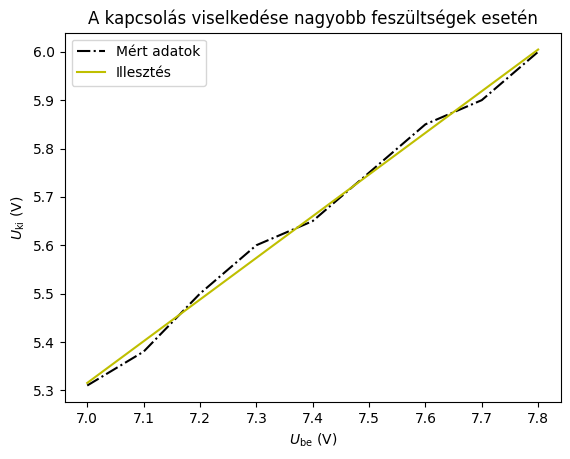

In [10]:
from scipy.optimize import curve_fit

Ube = np.array([0.5, 0.6, 0.7, 0.9, 0.95, 0.97, 1.5, 1., 0.94, 0.85, 0.83, 0.8, 7., 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8])
Uki = np.array([0.51, 0.51, 0.51, 0.51, 0.51, 4.94, 4.95, 4.95, 4.95, 4.95, 0.49, 0.49, 5.31, 5.38, 5.50, 5.60, 5.65, 5.75, 5.85, 5.9, 6.])

f = lambda t, a, b: a*t+b
[fit, cov] = curve_fit(f=f, xdata=Ube[12:], ydata=Uki[12:])
print(fit)
print(cov)

fig, ax = plt.subplots()
ax.plot(Ube[12:], Uki[12:], 'k-.', label='Mért adatok')
ax.plot(Ube[12:], f(Ube[12:], fit[0], fit[1]), 'y-', label='Illesztés')
ax.set_xlabel(r'$U_\mathrm{be}$ (V)')
ax.set_ylabel(r'$U_\mathrm{ki}$ (V)')
ax.legend()
ax.set_title('A kapcsolás viselkedése nagyobb feszültségek esetén')
plt.show()

Another common type of fit is the Gaussian, which can be done in the following way:

[1.09778005 5.09692472 6.72783373] [[ 0.00132247  0.00039508 -0.0059651 ]
 [ 0.00039508  0.0674684  -0.00654785]
 [-0.0059651  -0.00654785  0.07624306]]


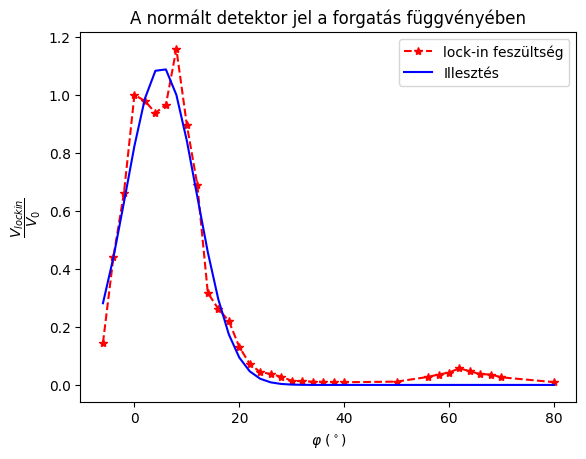

In [11]:
def Gauss(x, A, B, C):
    return A*np.exp(-(x-B)**2/(2*C**2))

szog = np.arange(-6, 82, 2) # +-0,2
szog = np.delete(szog, [24, 25, 26, 27, 29, 30, 39, 40, 41, 42])
lockin = np.array([2.10,6.40,9.60,14.5,14.2,13.6,14.0,16.8,13.0,10.0,4.60,3.80,3.20,1.90,1.05,0.640,0.550,0.410,0.210,0.180,0.165,0.150,0.140,0.135,0.165,0.400,0.520,0.620,0.830,0.680,0.540,0.520,0.380,0.140])
lockin2 = lockin / lockin[szog==0]

[par, cov] = curve_fit(f=Gauss, xdata=szog, ydata=lockin2, p0=[1.4, 4, 2], bounds=([1, -10, 0.0001], [2, 10, 10]))
print(par, cov)

fig, ax = plt.subplots()
ax.plot(szog, lockin2, 'r--*', label='lock-in feszültség')
ax.plot(szog, Gauss(szog, par[0], par[1], par[2]), 'b-', label='Illesztés')
ax.set_xlabel(r'$\varphi$ ($^\circ$)')
ax.set_ylabel(r'$\dfrac{V_{lockin}}{V_0}$')
ax.set_title('A normált detektor jel a forgatás függvényében')
ax.legend()
plt.savefig('3kar'+'.pdf', format='pdf', dpi=1000, bbox_inches='tight')

So far, this is all I could come up with, but this tutorial might be subject to change over time.